In [84]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,5)

plt.style.use('ggplot')


In [22]:
df = pd.read_csv('..\Datasets\international-airline-passengers.csv',parse_dates = ['Month'],index_col='Month')

In [23]:
df

,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
Month,
1949-01,112.0
1949-02,118.0
1949-03,132.0
1949-04,129.0
1949-05,121.0
...,...
1960-09,508.0
1960-10,461.0
1960-11,390.0


In [24]:
df.isna().sum()

International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60    1
dtype: int64

In [27]:
df.rename(columns = {'International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60':'Month_Totals'},inplace=True)

C:\Users\Win\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [28]:
df

,Month_Totals
Month,
1949-01,112.0
1949-02,118.0
1949-03,132.0
1949-04,129.0
1949-05,121.0
...,...
1960-08,606.0
1960-09,508.0
1960-10,461.0


In [29]:
df = df.dropna()

In [30]:
df.info()
df.Month_Totals

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 1949-01 to 1960-12
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Month_Totals  144 non-null    float64
dtypes: float64(1)
memory usage: 2.2+ KB


Month
1949-01    112.0
1949-02    118.0
1949-03    132.0
1949-04    129.0
1949-05    121.0
           ...  
1960-08    606.0
1960-09    508.0
1960-10    461.0
1960-11    390.0
1960-12    432.0
Name: Month_Totals, Length: 144, dtype: float64

In [31]:
from statsmodels.tsa.stattools import adfuller

In [65]:
# result = adfuller(df.Month_Totals)
result = adfuller(df.Month_Totals.diff().dropna())

print(f'ADF Statestic {result[0]}')
print(f'P-Value {result[1]}')
print(f'The number of lags used {result[2]}')
print(f'The number of observations used for the ADF regression and calculation of the critical values. {result[3]}')
print(f'Critical values for the test statistic at the 1 %, 5 %, and 10 % levels {result[4]}')
      
# result[0]

ADF Statestic -2.8292668241700074
P-Value 0.05421329028382446
The number of lags used 12
The number of observations used for the ADF regression and calculation of the critical values. 130
Critical values for the test statistic at the 1 %, 5 %, and 10 % levels {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}


In [ ]:
# d = 1

In [63]:
if result[1] < 0.05:
    print('Series is Stationary')
else:
    print('Series is non Stationary')

Series is non Stationary


In [53]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
# import matplotlib.pylab as mpl


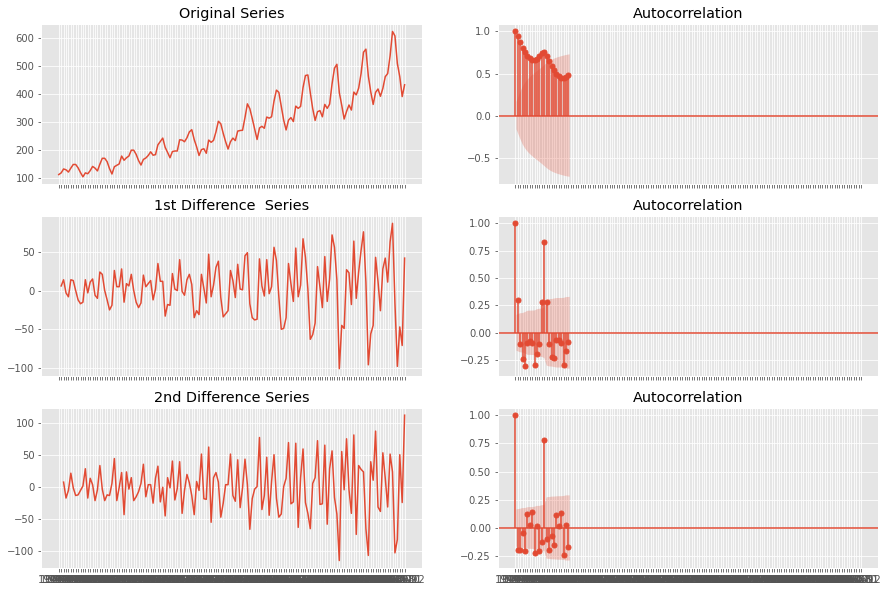

In [56]:
fig,axes = plt.subplots(3,2,sharex = True)

axes[0,0].plot(df.Month_Totals);axes[0,0].set_title('Original Series')
plot_acf(df.Month_Totals,ax = axes[0,1])

axes[1,0].plot(df.Month_Totals.diff());axes[1,0].set_title('1st Difference  Series')
plot_acf(df.Month_Totals.diff().dropna(),ax = axes[1,1])

axes[2,0].plot(df.Month_Totals.diff().diff());axes[2,0].set_title('2nd Difference Series')
plot_acf(df.Month_Totals.diff().diff().dropna(),ax = axes[2,1])
plt.show()

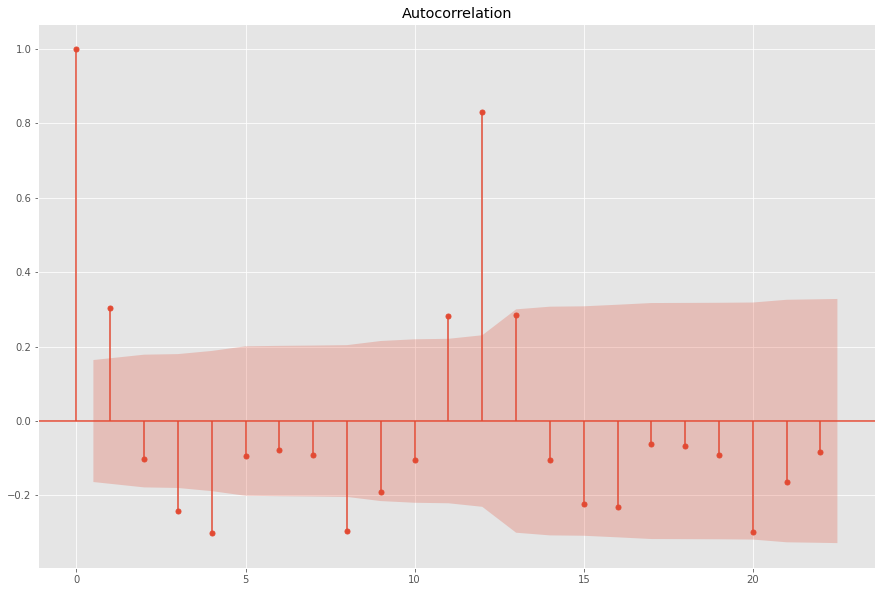

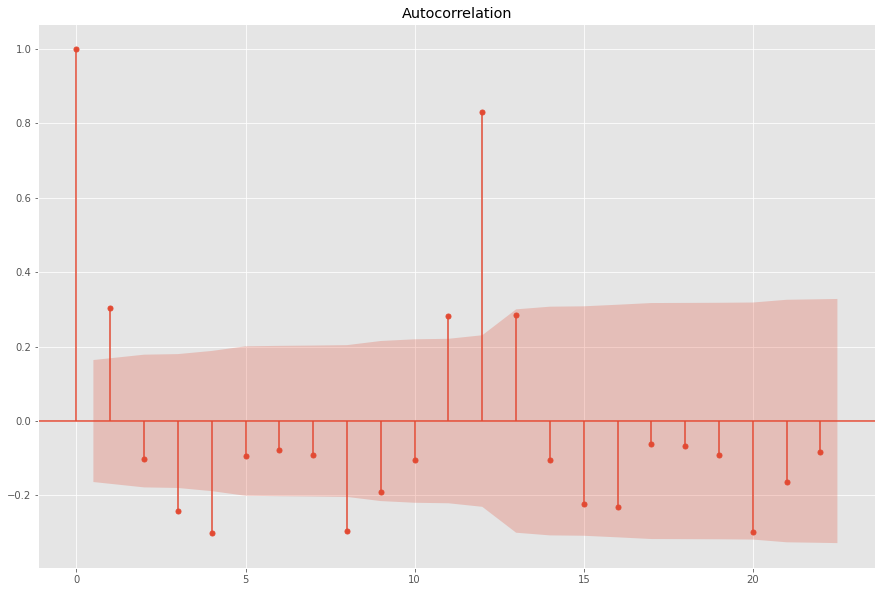

In [58]:
plot_acf(df.Month_Totals.diff().dropna())

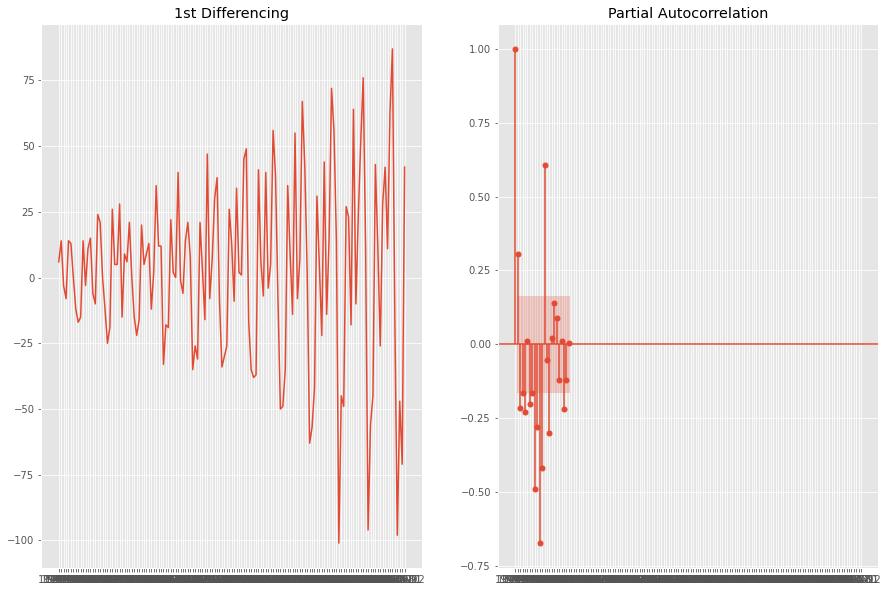

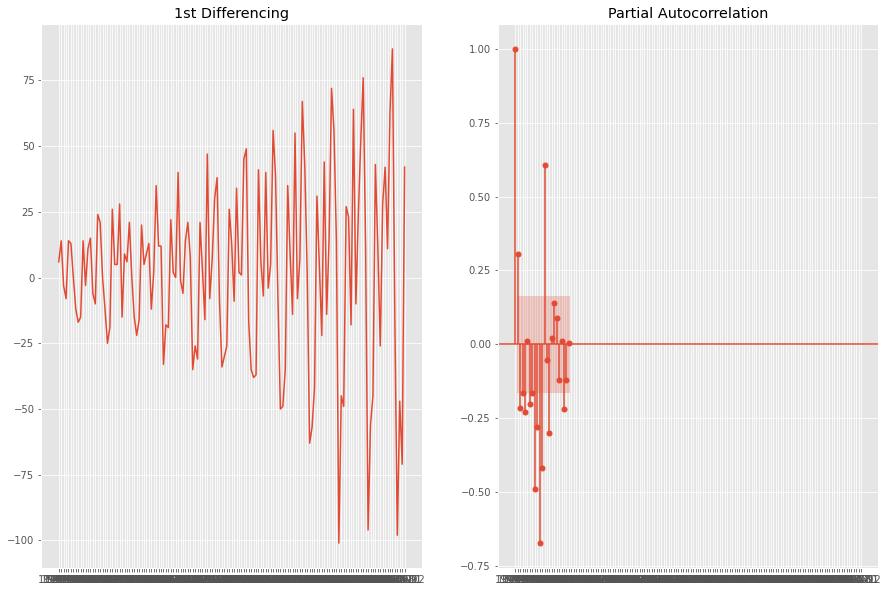

In [60]:
# so d = 1
fig,axes = plt.subplots(1,2,sharex = True)
axes[0].plot(df.Month_Totals.diff().dropna());axes[0].set_title('1st Differencing')
plot_pacf(df.Month_Totals.diff().dropna(),ax = axes[1])

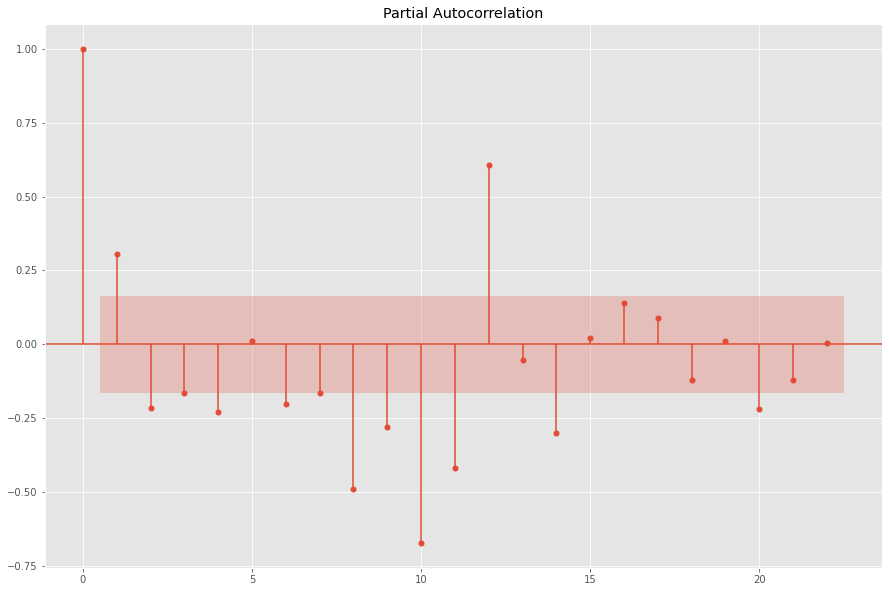

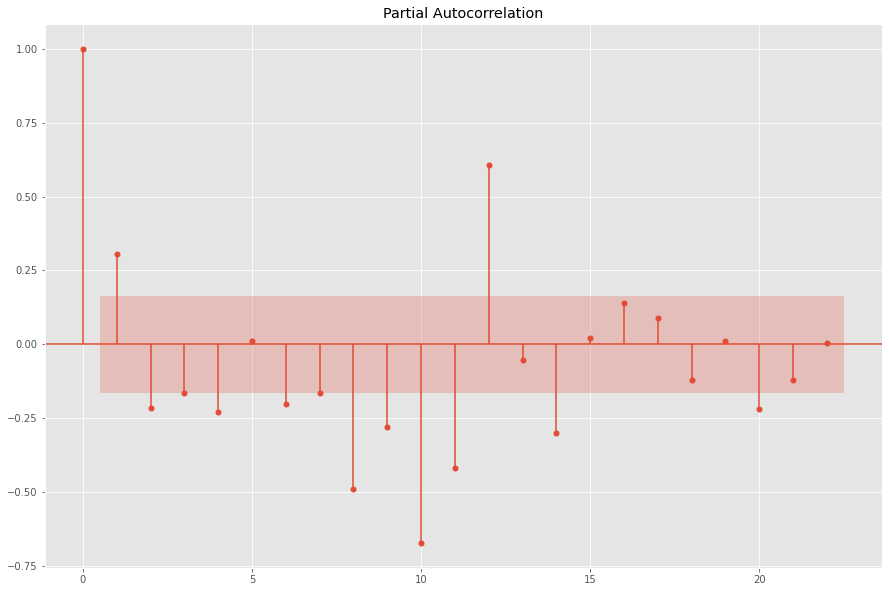

In [61]:
plot_pacf(df.Month_Totals.diff().dropna())

In [66]:
# p = 1,q = 1

In [67]:
from statsmodels.tsa.arima_model import ARIMA

In [79]:
model = ARIMA(df.Month_Totals,order = (1,1,1) )#(pdq)
model_fit = model.fit(disp = 0)

C:\Users\Win\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Win\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency

In [80]:
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:         D.Month_Totals   No. Observations:                  143
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -697.073
Method:                       css-mle   S.D. of innovations             31.338
Date:                Tue, 13 Apr 2021   AIC                           1402.145
Time:                        14:51:54   BIC                           1413.997
Sample:                    02-01-1949   HQIC                          1406.961
                         - 12-01-1960                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    2.6112      0.228     11.435      0.000       2.164       3.059
ar.L1.D.Month_Totals     0.7400      0.058     12.778      0.000       0.626       0.854
ma.L1.D.Mont

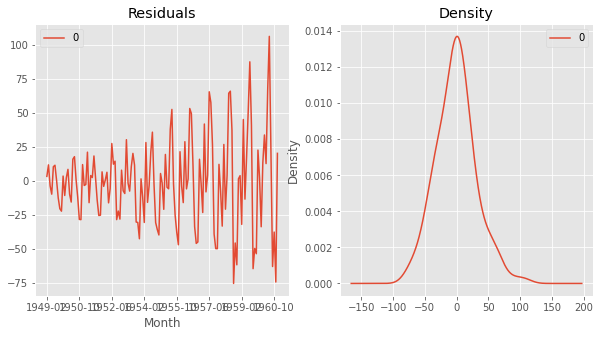

In [85]:
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()